In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as py
import numpy as np
from imp import reload
import pixie_read_st as pxr

In [2]:
from matplotlib import animation, rc
import matplotlib.animation as animation
import types
from IPython.display import HTML

In [2]:
import master_read as m
import efit_plots as e
import os
import sys

In [3]:
plt.style.use('ggplot')
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['text.usetex']=True

In [4]:
eqdsk_file = "/net/scratch3/chacon/pixie3d/EFIT/ITER/ITER3-chipar/3d/SN_fr_11_sh.geqdsk"

In [8]:
filepath = "/lustre/scratch4/turquoise/giannis_kx/pixie3d/iter/int_kink/11/11_visc_old_nodiff/11_visc_old_nodiff.scratch/"

In [6]:
def eqdsk_info():
    global a
    sys.stdout = open(os.devnull, 'w')
    m.read_geqdsk(eqdsk_file)
    m.struct_hor_ax_det()
    e.gridsNunits()
    e.intersections()
    sys.stdout = sys.__stdout__

In [12]:
eqdsk_info()

In [9]:
pxr.pixieload(filepath + "pixie3d.h5")

timesteps= 87
Dictionary of terms:
Variables: ['Car_variables', 'Cnv_variables', 'Cov_variables', 'Diagnostics', 'Perturbations', 'cells', 'nodes']
Cartesian: ['Bx', 'By', 'Bz', 'Jx', 'Jy', 'Jz', 'Prs', 'Ve_1', 'Ve_2', 'Ve_3', 'Vx', 'Vy', 'Vz', 'rho']
Contravariant: ['B^1', 'B^2', 'B^3', 'J*P^2', 'J.(pi+pe)', 'J.Rho', 'J^1', 'J^2', 'J^3', 'P^1', 'P^3']
Covariant: ['B_1', 'B_2', 'B_3', 'J_1', 'J_2', 'J_3', 'T=Te+Ti', 'V_1', 'V_2', 'V_3', 'rho']
Diagnostic: ['E_1', 'E_2', 'E_3', 'Int. heat src', 'Poloidal flux', 'Ti+Te', 'chi par', 'chi perp', 'diff', 'eta', 'lambda', 'local div(B)', 'local div(J)', 'local div(V)', 'nu', 'q factor']
Perturbations: ['B^1_pert', 'B^2_pert', 'B^3_pert', 'P^1_pert', 'P^2_pert', 'P^3_pert', 'Prs_pert', 'Rho_pert']
Cell: ['X', 'Y', 'Z']
Node: ['X', 'Y', 'Z']


In [11]:
import diagnostic

In [72]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [31]:
reload(diagnostic)

<module 'diagnostic' from '/turquoise/users/giannis_kx/python_pixie/diagnostic.py'>

timesteps= 87
Dictionary of terms:
Variables: ['Car_variables', 'Cnv_variables', 'Cov_variables', 'Diagnostics', 'Perturbations', 'cells', 'nodes']
Cartesian: ['Bx', 'By', 'Bz', 'Jx', 'Jy', 'Jz', 'Prs', 'Ve_1', 'Ve_2', 'Ve_3', 'Vx', 'Vy', 'Vz', 'rho']
Contravariant: ['B^1', 'B^2', 'B^3', 'J*P^2', 'J.(pi+pe)', 'J.Rho', 'J^1', 'J^2', 'J^3', 'P^1', 'P^3']
Covariant: ['B_1', 'B_2', 'B_3', 'J_1', 'J_2', 'J_3', 'T=Te+Ti', 'V_1', 'V_2', 'V_3', 'rho']
Diagnostic: ['E_1', 'E_2', 'E_3', 'Int. heat src', 'Poloidal flux', 'Ti+Te', 'chi par', 'chi perp', 'diff', 'eta', 'lambda', 'local div(B)', 'local div(J)', 'local div(V)', 'nu', 'q factor']
Perturbations: ['B^1_pert', 'B^2_pert', 'B^3_pert', 'P^1_pert', 'P^2_pert', 'P^3_pert', 'Prs_pert', 'Rho_pert']
Cell: ['X', 'Y', 'Z']
Node: ['X', 'Y', 'Z']
Logical Grid Interpolations done. All array (A) interpolators take A_int.


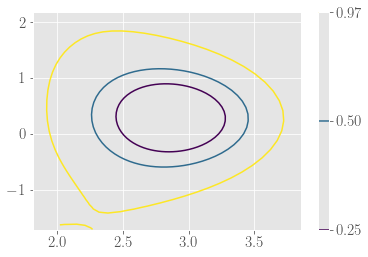

In [32]:
diagnostic.diagnose_normalization()

In [9]:
def setvisible(self,vis):
    for c in self.collections: c.set_visible(vis)
def setanimated(self,ani):
    for c in self.collections: c.set_animated(ani)

In [10]:
Te = pxr.load_array(0,6,0,86)

In [11]:
psi_pol = pxr.load_array(3,4,0,1)

In [13]:
r_sep = [x for x in m.DS.rbbbs]
z_sep = [x for x in m.DS.zbbbs]

In [14]:
psi_pol_n0 = np.mean(psi_pol,axis=2)

In [15]:
MA = np.unravel_index(np.argmin(psi_pol_n0[:,:,0]),(psi_pol.shape[0],psi_pol.shape[1]))

In [16]:
Te_n0 = np.mean(Te,axis=2)

In [17]:
Tpeak = Te_n0[MA[0],MA[1],0]

In [18]:
Tnorm = 1/Tpeak

In [19]:
dTe = Te-Te_n0[:,:,np.newaxis,:]

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


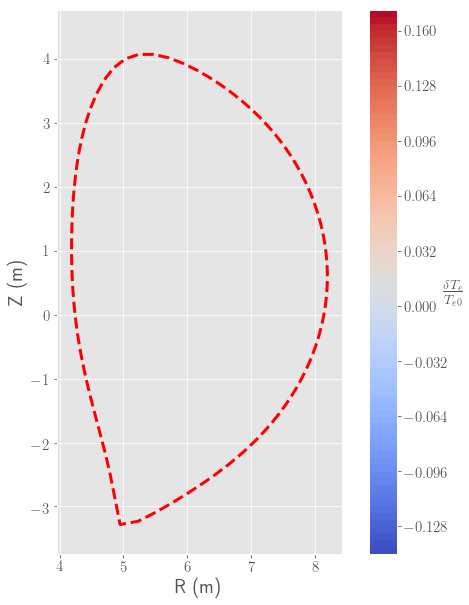

In [32]:
fig = plt.figure(figsize=(10,10))
plt.plot(r_sep,z_sep,color='red',linewidth=3,linestyle='--')
plt.axes().set_aspect("equal")
plt.xlabel("R (m)")
plt.ylabel("Z (m)")

ims = []
for i in range(86):
    #im = plt.contourf(pxr.X[:,:,0]*e.a,pxr.Z[:,:,0]*e.a,np.log10(Te[:,:,0,i]*Tnorm),80,cmap="coolwarm")
    im = plt.contourf(pxr.X[:,:,0]*e.a,pxr.Z[:,:,0]*e.a,(dTe[:,:,0,i]*Tnorm),80,cmap="coolwarm")
    text = 't = '+str(i*10)+ r'$\;\tau_A$'
    an = plt.annotate(text, xy=(0.8, 0.94), xycoords='axes fraction',fontsize=14)
        
    #################################################################
    ## Bug fix for Quad Contour set not having attribute 'set_visible'
    im.set_visible = types.MethodType(setvisible,im)
    im.set_animated = types.MethodType(setanimated,im)
    im.axes = plt.gca()
    im.figure=fig
    ####################################################################
    
    ims.append(im.collections+[an])
cbar = plt.colorbar()
cbar.set_label(r"$\frac{\delta T_e}{T_{e0}}$",rotation=0)
#cbar.set_label(r"$\log_{10}\left(\frac{T_e}{T_o}\right)$",rotation=0,labelpad=42)

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=False,repeat_delay=100)

In [33]:
HTML(ani.to_html5_video())

## Connection Lengths

In [10]:
import connection_length as cnc

In [11]:
reload(cnc)

<module 'connection_length' from '/turquoise/users/giannis_kx/python_pixie/connection_length.py'>

In [12]:
# Initial condition grid
Nr = 100
Nu = 100
r_ic = np.linspace(0,1,Nr)
u_ic = np.linspace(0.0,2*np.pi,Nu)
R_grid, U_grid = np.meshgrid(r_ic,u_ic)

In [13]:
pxr.Coordinate_Maps_Interpolations()

In [14]:
filepath_cnc = "/lustre/scratch4/turquoise/giannis_kx/FTLE/11-visc-old-nodiff/"

t=400

In [15]:
rs1,us1,conn1 = cnc.read_connection_lengths_logical(filepath_cnc+"t400/","406.486",32)

In [16]:
CNL1, Ctuples1 = cnc.cnc_coord_tuples(rs1,us1,conn1)

In [17]:
conn_array1 = cnc.conn_array(CNL1,Ctuples1,R_grid,U_grid,100,100)

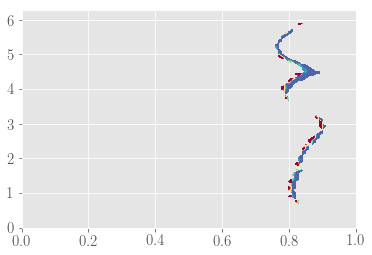

In [19]:
plt.contourf(R_grid,U_grid,conn_array1,50,cmap='Spectral_r',vmax=5000)
cmap = plt.cm.get_cmap()
cmap.set_bad(color='black')
plt.show()

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


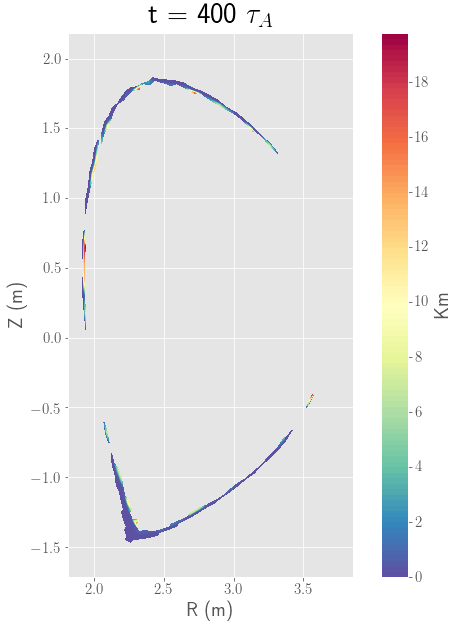

In [20]:
plt.figure(figsize=(10,10))
plt.contourf(pxr.X_int((R_grid,U_grid,0)),pxr.Z_int((R_grid,U_grid,0)),conn_array1/1000,100,cmap='Spectral_r')
cmap.set_bad(color='black')
#plt.plot(pxr.X_int((R_mg[0,34],U_mg[0,34],0)),pxr.Z_int((R_mg[0,34],U_mg[0,34],0)),"*")
plt.xlabel('R (m)')
plt.ylabel('Z (m)')
plt.axes().set_aspect("equal")
cbar = plt.colorbar()
cbar.ax.set_ylabel("Km")
plt.title(r"t = 400 $\tau_A$")
plt.show()

In [27]:
import math

In [21]:
R_bins1=list(set(rs1))

In [22]:
R_bins1.sort()

In [39]:
chunk1=int(math.floor(len(R_bins1)/7))

In [40]:
chunk1

2

In [33]:
reload(cnc)

<module 'connection_length' from '/turquoise/users/giannis_kx/python_pixie/connection_length.py'>

In [34]:
avg11,avg21,avg31,avg41,avg51,avg61 = cnc.R_Bins(rs1,conn1)

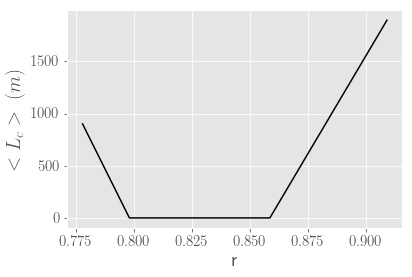

In [63]:
plt.plot((R_bins1[chunk1],R_bins1[2*chunk1],R_bins1[3*chunk1],R_bins1[4*chunk1],R_bins1[5*chunk1],R_bins1[-1]),(avg11,avg21,avg31,avg41,avg51,avg61),"k")
plt.xlabel("r")
plt.ylabel(r"$<L_c> \; (m)$")
plt.show()

t=500

In [43]:
rs2,us2,conn2 = cnc.read_connection_lengths_logical(filepath_cnc+"t500/","501.781",32)

In [44]:
CNL2, Ctuples2 = cnc.cnc_coord_tuples(rs2,us2,conn2)

In [45]:
conn_array2 = cnc.conn_array(CNL2,Ctuples2,R_grid,U_grid,100,100)

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


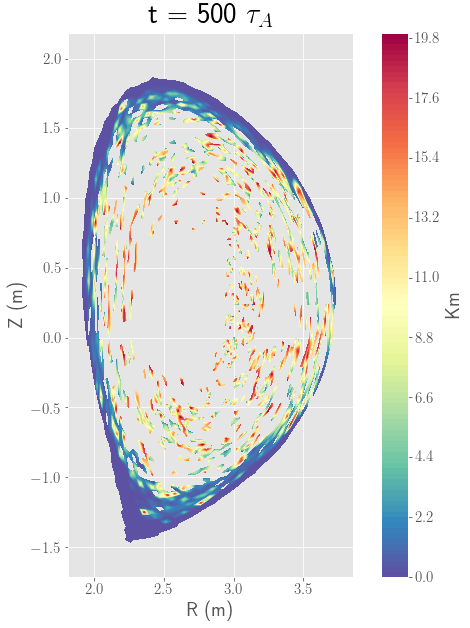

In [46]:
plt.figure(figsize=(10,10))
plt.contourf(pxr.X_int((R_grid,U_grid,0)),pxr.Z_int((R_grid,U_grid,0)),conn_array2/1000,100,cmap='Spectral_r')
cmap.set_bad(color='black')
plt.xlabel('R (m)')
plt.ylabel('Z (m)')
plt.axes().set_aspect("equal")
cbar = plt.colorbar()
cbar.ax.set_ylabel("Km")
plt.title(r"t = 500 $\tau_A$")
plt.show()

In [47]:
R_bins2=list(set(rs2))

In [48]:
R_bins2.sort()

In [51]:
chunk2=int(math.floor(len(R_bins2)/7))

In [52]:
avg12,avg22,avg32,avg42,avg52,avg62 = cnc.R_Bins(rs2,conn2)

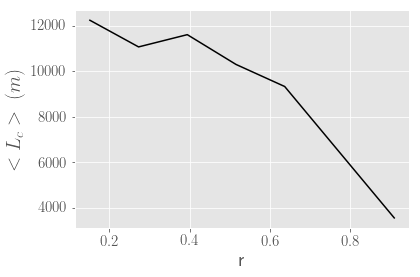

In [62]:
plt.plot((R_bins2[chunk2],R_bins2[2*chunk2],R_bins2[3*chunk2],R_bins2[4*chunk2],R_bins2[5*chunk2],R_bins2[-1]),(avg12,avg22,avg32,avg42,avg52,avg62),"k")
plt.xlabel("r")
plt.ylabel(r"$<L_c>\; (m)$")
plt.show()

t=654

In [54]:
rs3,us3,conn3 = cnc.read_connection_lengths_logical(filepath_cnc+"t654/","654.737",32)

In [55]:
CNL3, Ctuples3 = cnc.cnc_coord_tuples(rs3,us3,conn3)

In [56]:
conn_array3 = cnc.conn_array(CNL3,Ctuples3,R_grid,U_grid,100,100)

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


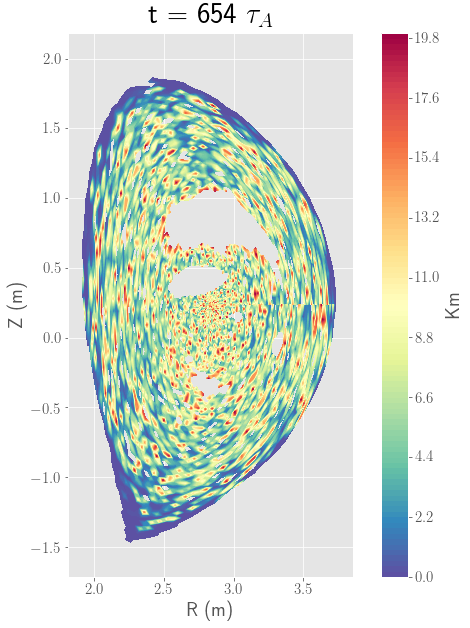

In [57]:
plt.figure(figsize=(10,10))
plt.contourf(pxr.X_int((R_grid,U_grid,0)),pxr.Z_int((R_grid,U_grid,0)),conn_array3/1000,100,cmap='Spectral_r')
cmap.set_bad(color='black')
plt.xlabel('R (m)')
plt.ylabel('Z (m)')
plt.axes().set_aspect("equal")
cbar = plt.colorbar()
cbar.ax.set_ylabel("Km")
plt.title(r"t = 654 $\tau_A$")
plt.show()

In [58]:
R_bins3=list(set(rs3))

In [59]:
R_bins3.sort()

In [60]:
chunk3=int(math.floor(len(R_bins3)/7))

In [61]:
avg13,avg23,avg33,avg43,avg53,avg63 = cnc.R_Bins(rs3,conn3)

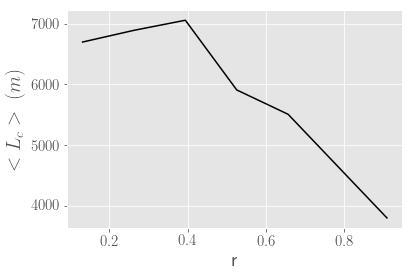

In [64]:
plt.plot((R_bins3[chunk3],R_bins3[2*chunk3],R_bins3[3*chunk3],R_bins3[4*chunk3],R_bins3[5*chunk3],R_bins3[-1]),(avg13,avg23,avg33,avg43,avg53,avg63),"k")
plt.xlabel("r")
plt.ylabel(r"$<L_c>\; (m)$")
plt.show()

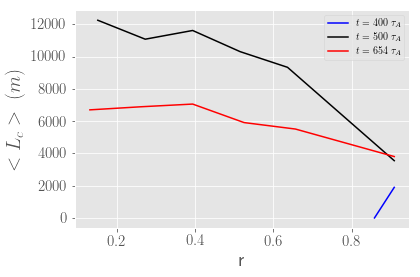

In [70]:
plt.plot((R_bins1[5*chunk1],R_bins1[-1]),(avg51,avg61),"b", label = r"$t = 400 \; \tau_A$")
plt.plot((R_bins2[chunk2],R_bins2[2*chunk2],R_bins2[3*chunk2],R_bins2[4*chunk2],R_bins2[5*chunk2],R_bins2[-1]),(avg12,avg22,avg32,avg42,avg52,avg62),"k", label = r"$t = 500 \; \tau_A$")
plt.plot((R_bins3[chunk3],R_bins3[2*chunk3],R_bins3[3*chunk3],R_bins3[4*chunk3],R_bins3[5*chunk3],R_bins3[-1]),(avg13,avg23,avg33,avg43,avg53,avg63),"r", label = r"$t = 654 \; \tau_A$")
plt.legend()
plt.xlabel("r")
plt.ylabel(r"$<L_c>\; (m)$")
plt.show()

In [81]:
reload(cnc)

<module 'connection_length' from '/turquoise/users/giannis_kx/python_pixie/connection_length.py'>

In [82]:
avg_list1, r_list1 = cnc.R_Bins2(rs1,conn1,2.18,20000,6)
avg_list3, r_list3 = cnc.R_Bins2(rs3,conn3,2.18,20000,6)
avg_list2, r_list2 = cnc.R_Bins2(rs2,conn2,2.18,20000,6)

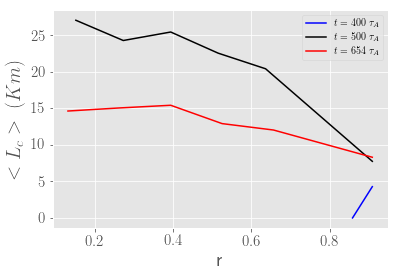

In [83]:
plt.plot(r_list1[4:],avg_list1[4:],"b",label = r"$t = 400 \; \tau_A$")
plt.plot(r_list2,avg_list2,"k",label = r"$t = 500 \; \tau_A$")
plt.plot(r_list3,avg_list3,"r",label = r"$t = 654 \; \tau_A$")
plt.legend()
plt.xlabel("r")
plt.ylabel(r"$<L_c>\; (Km)$")
plt.show()